## Tabular Dataset Analysis
### Adult Income Prediction

In [1]:
#importing necessary libraries

#data manipulation and visualization
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#EDA and preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Classic machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#model evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#ANN libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.base import clone
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau




#Model interpretability
from sklearn.inspection import permutation_importance
import shap

#Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


print("All libraries imported successfully.")

All libraries imported successfully.


## 1. Data Loading & Preparation
Loading and combining the Adult Income dataset from training and test files, for manual usage of train and test splits. 
then separating features and target variables

In [2]:
#setting random state and dataset files

random_state = 126233 # personal seed choice (Rolex Datejust 36 reference number)
print("Random state set to:", random_state)

#setting column names for the Adult dataset, gathered from adult.names file
column_names = [  "age", "workclass", "fnlwgt", "education", "education-num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income" ]

#reading the Adult dataset files
a_train = pd.read_csv("adult.csv", header=None, names = column_names)
a_test = pd.read_csv("adult_test.csv", header=None, skiprows=1, names = column_names)  
a_test["income"] = a_test["income"].str.strip().str.replace('.', '', regex=False)  

#combining train and test datasets for unified preprocessing
adult_data = pd.concat([a_train, a_test], ignore_index=True)

print(a_test.shape)
print(a_train.shape)
print(adult_data.shape)
print("\nAdult Dataset Preview:")
display(adult_data.head())

print("Datasets loaded and combined successfully.")

Random state set to: 126233
(16281, 15)
(32561, 15)
(48842, 15)

Adult Dataset Preview:


,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Datasets loaded and combined successfully.


In [3]:
#Seperating features and target variable
TARGET = "income"
if not adult_data.empty:
    adult_features = adult_data.drop(columns=[TARGET])
    adult_target = adult_data[TARGET]
    print("Features and target variable separated.")
    print("Features shape:", adult_features.shape)
    print("Target shape:", adult_target.shape)
else:
    print("The adult_data DataFrame is empty. Cannot separate features and target variable.")



#Identifying numerical and categorical features
ad_feat_num = adult_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
ad_feat_cat = adult_features.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", ad_feat_num)
print("Categorical features:", ad_feat_cat)

Features and target variable separated.
Features shape: (48842, 14)
Target shape: (48842,)
Numerical features: ['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


## 2. Target Variable & Missing Values Analysis
Examining the target column for any values other than ">50k" and "<=50K" so as to fish out any Null/NaN, false and psuedo correct values (correct values being treated as unique due to whitespace and/or case sensitivity)

In [4]:
# Check for NaN values in income column
print("NaN values in 'income' column:", adult_target.isna().sum())
print("Total rows:", len(adult_data))
print("Percentage of missing values:", (adult_target.isna().sum() / len(adult_data)) * 100, "%")


# Display unique values in income column
print("\nUnique values in 'income' column:")
print(adult_target.value_counts(dropna=False))


# Strip whitespace from income values
adult_target = adult_target.str.strip()
print("\nUnique values in 'income' column after stripping whitespace:")
print(adult_target.value_counts(dropna=False))

NaN values in 'income' column: 0
Total rows: 48842
Percentage of missing values: 0.0 %

Unique values in 'income' column:
income
 <=50K    24720
<=50K     12435
 >50K      7841
>50K       3846
Name: count, dtype: int64

Unique values in 'income' column after stripping whitespace:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)
Visualizing distributions of numerical and categorical features, correlations, count of target values per categorical features along with missing value patterns.


Starting EDA visualizations...
Visualizing target variable distribution...
Target Distribution:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


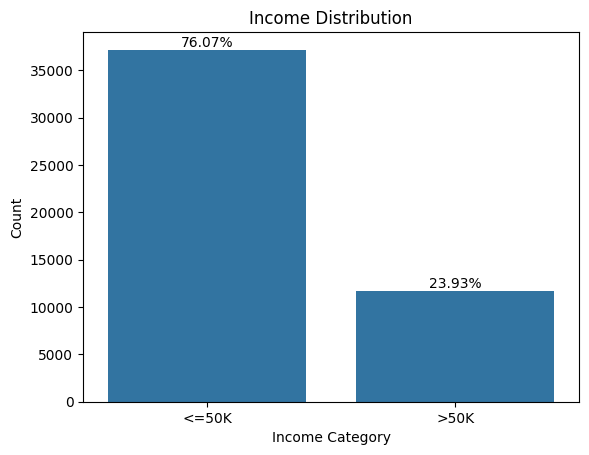

Visualizing correlation heatmap for numerical features...


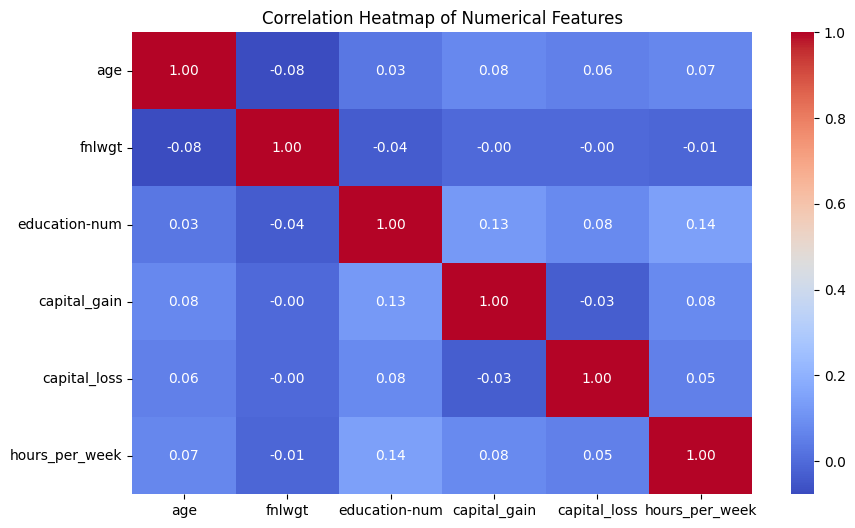

Visualizing histograms for numerical features...


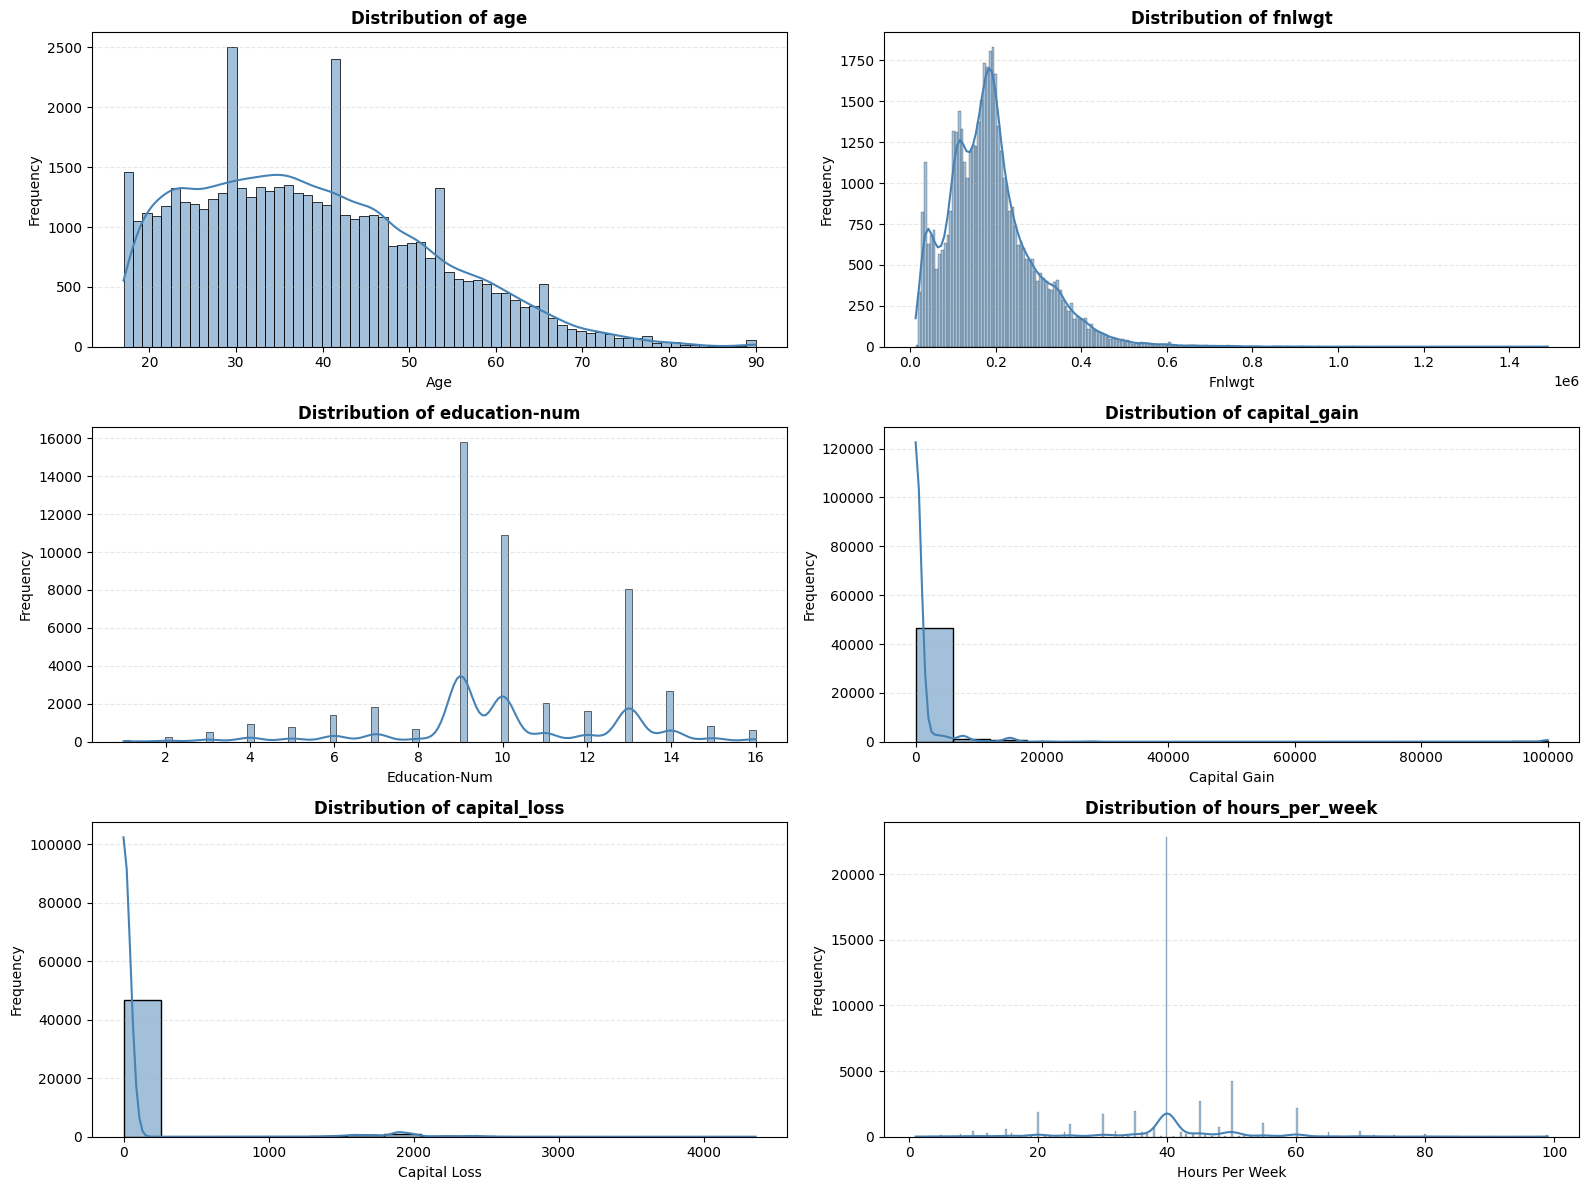

Visualizing box plots for numerical features...


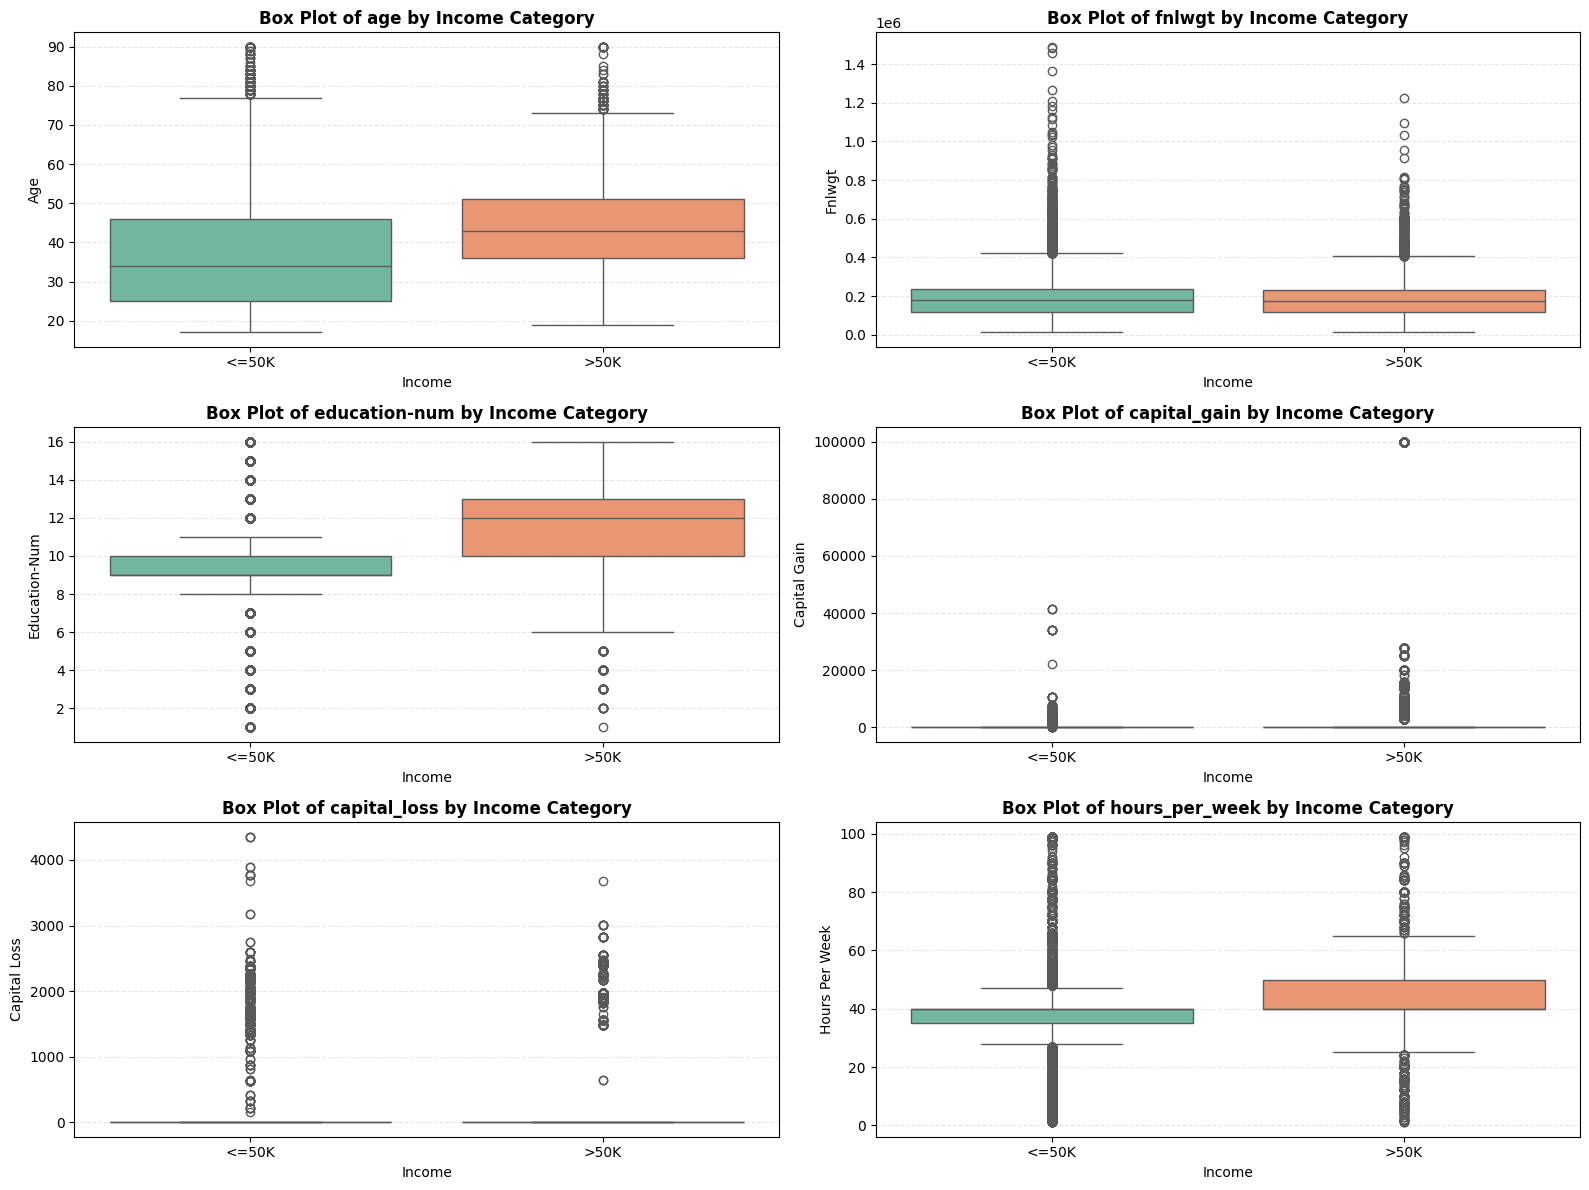

Visualizing count plots for categorical features...


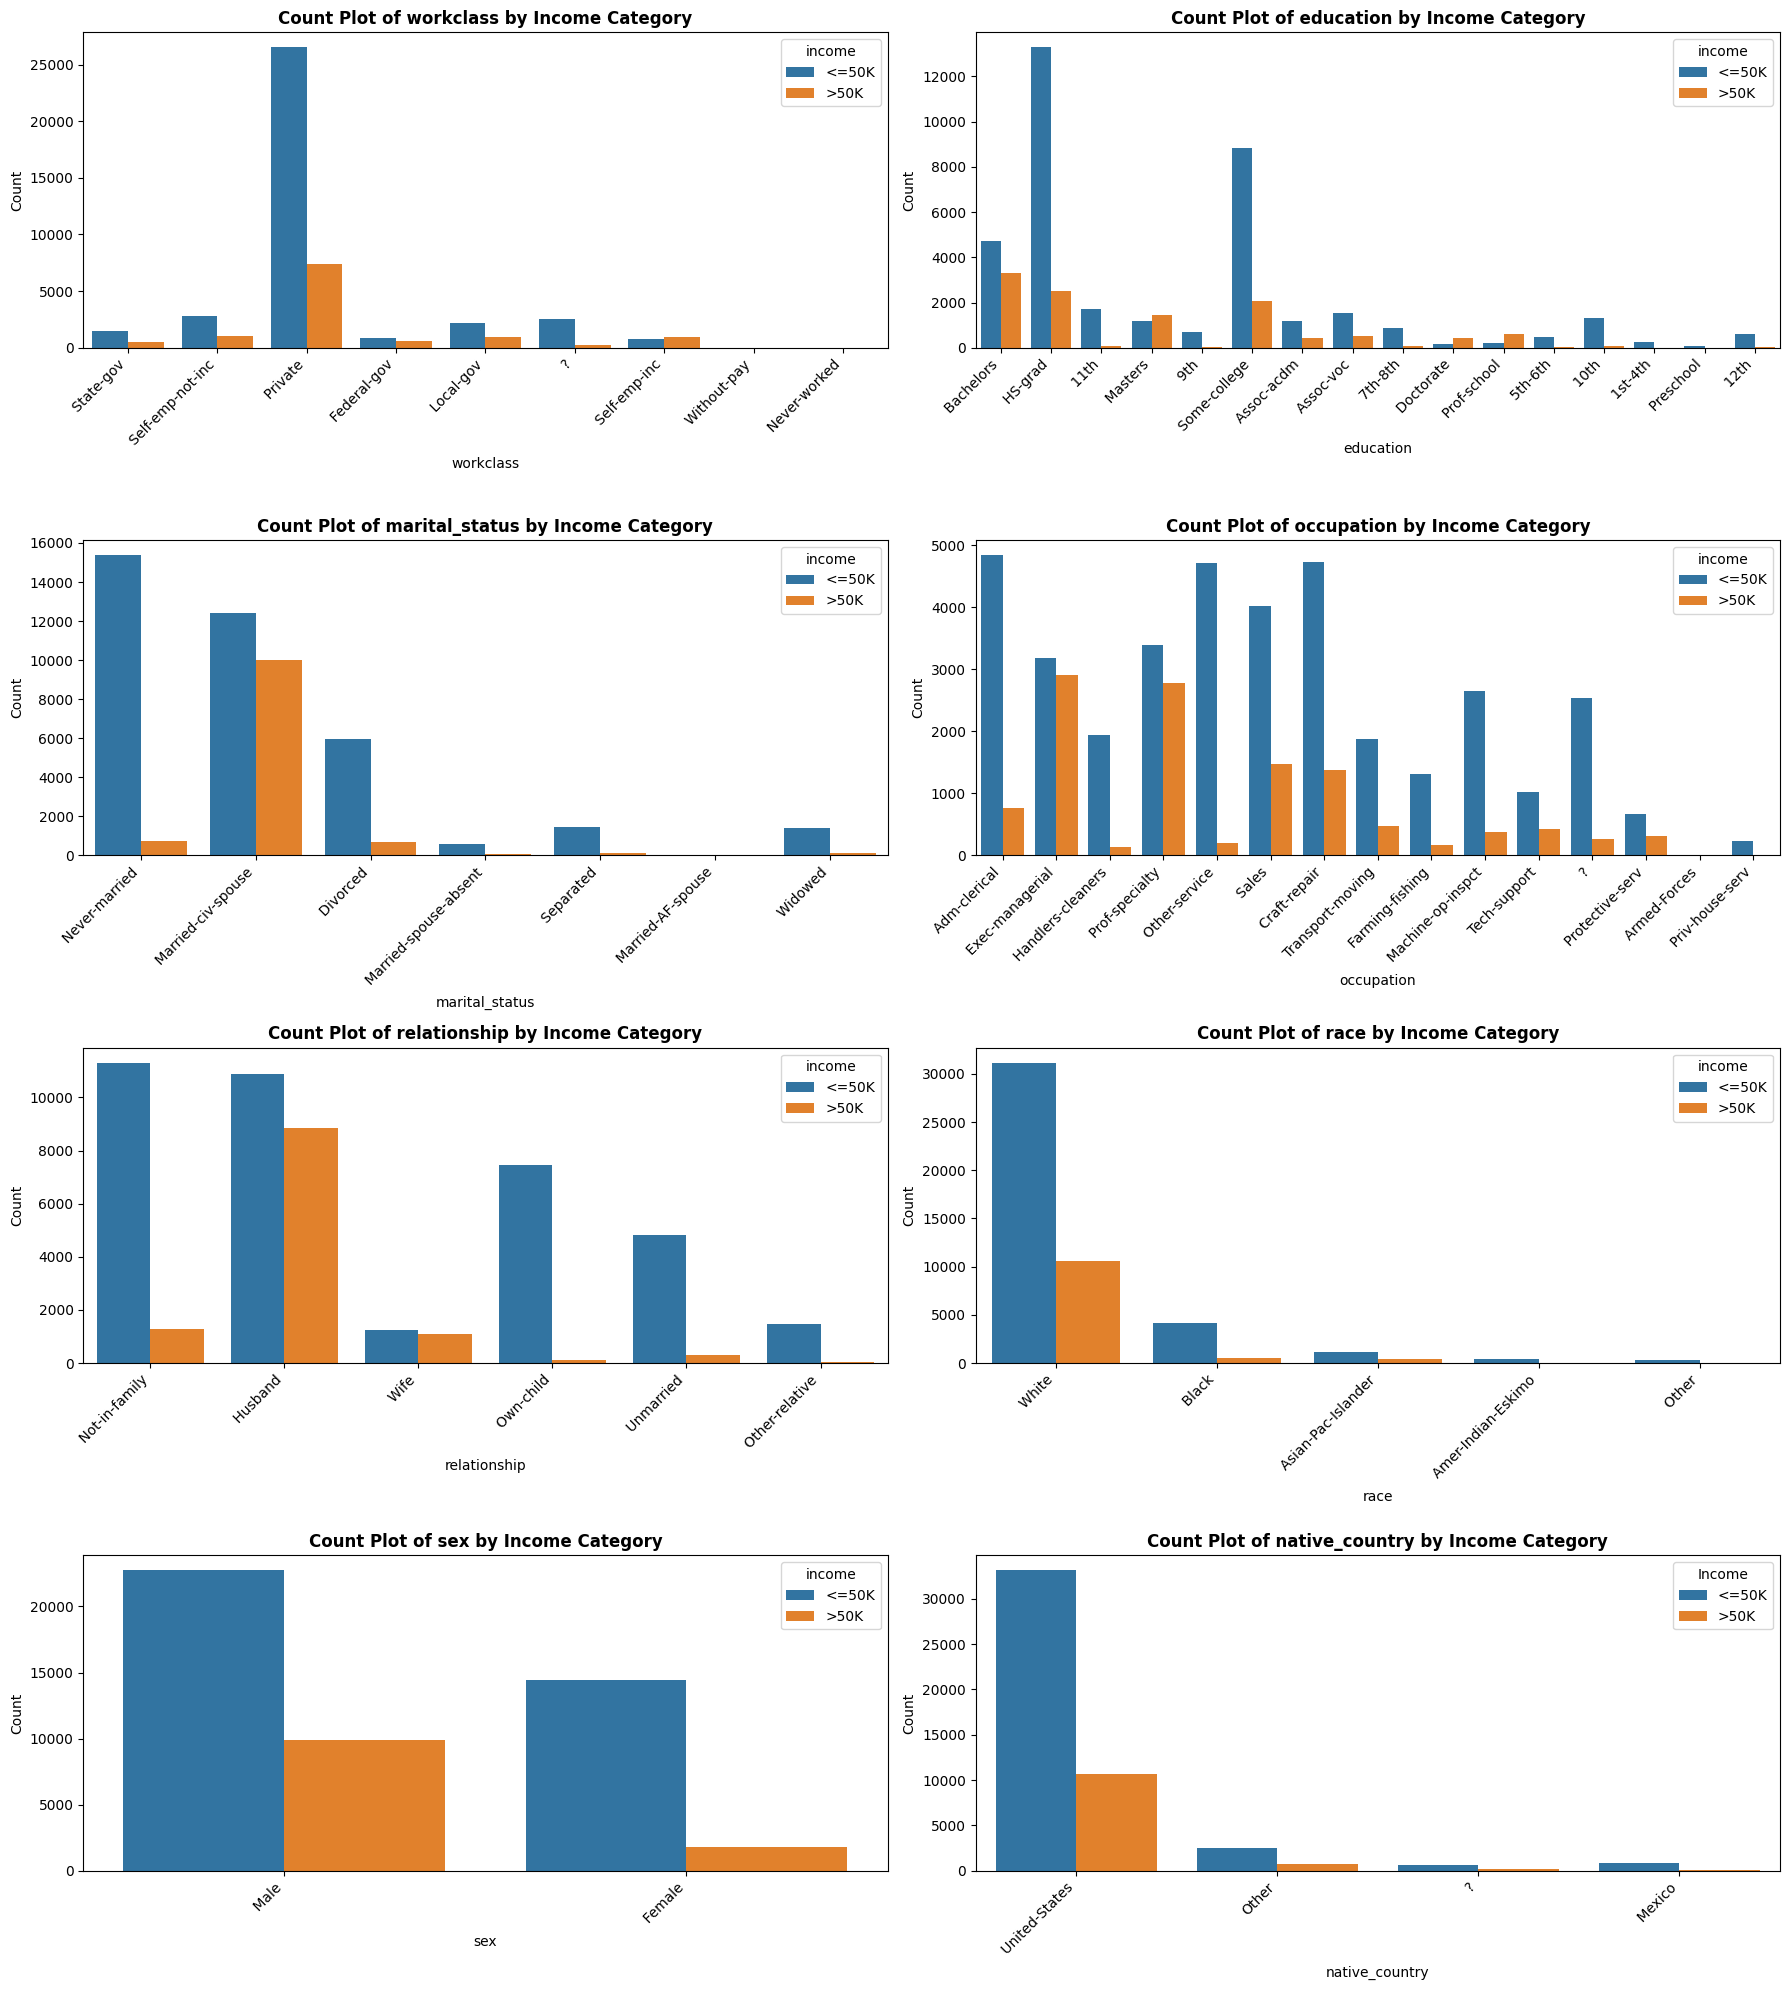

Handling and visualizing missing values...
Missing values '?' now represented as NaN.

Info:


C:\Users\Shaurya\AppData\Local\Temp\ipykernel_24612\3072103367.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adult_data = adult_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None


Missing values per column:


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

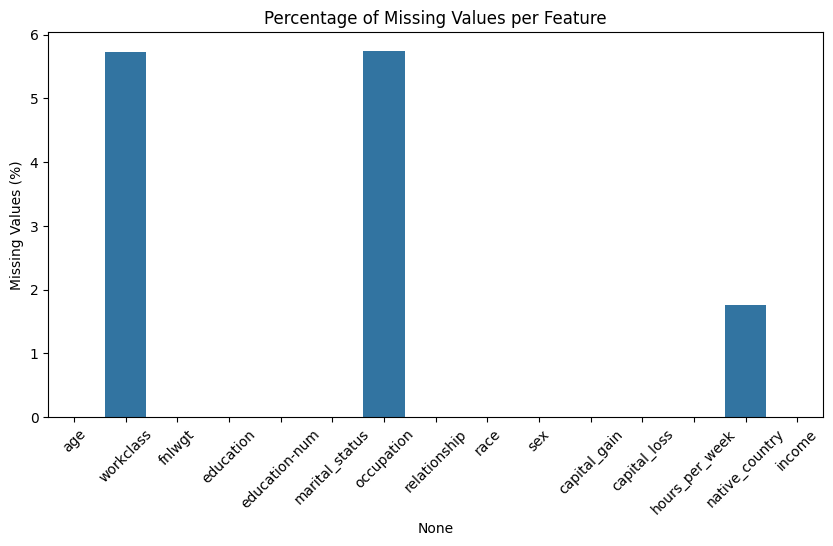

EDA visualizations completed.


In [5]:
# EDA
print("\nStarting EDA visualizations...")
# Visualizing target variable distribution 
print("Visualizing target variable distribution...")
if not adult_data.empty:
    print("Target Distribution:")
    print(adult_target.value_counts())
    plt.figure()
    plt.title("Income Distribution")
    plt.xlabel("Income Category")
    plt.ylabel("Count")
    sns.countplot(x=adult_target)

    #Showing percentages on bars
    total = len(adult_data)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2, height), 
                           ha='center', va='bottom')
    plt.show()

    print("Visualizing correlation heatmap for numerical features...")
    #Correlation heatmap for numerical features
    if ad_feat_num:

        plt.figure(figsize=(10, 6))
        corr_matrix = adult_data[ad_feat_num].corr()
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title("Correlation Heatmap of Numerical Features")
        plt.show()
    else:
        print("No numerical features available for correlation heatmap.")
    
    # #Histograms for numerical features

    print("Visualizing histograms for numerical features...")


    n_features = len(ad_feat_num)
    n_cols = 2
    n_rows = (n_features + 1) // 2
    plt.figure(figsize=(16, 4 * n_rows))
    for idx, feature in enumerate(ad_feat_num):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.histplot(adult_features[feature], kde=True, color='steelblue')
        plt.title(f"Distribution of {feature}", fontsize=12, fontweight='bold')
        plt.xlabel(feature.replace('_', ' ').title(), fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()


    print("Visualizing box plots for numerical features...")
    plt.figure(figsize=(16, 4 * n_rows))
    for idx, feature in enumerate(ad_feat_num):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.boxplot(x=adult_target, y=adult_features[feature], hue=adult_target, palette='Set2', legend=False)
        plt.title(f"Box Plot of {feature} by Income Category", fontsize=12, fontweight='bold')
        plt.xlabel("Income", fontsize=10)
        plt.ylabel(feature.replace('_', ' ').title(), fontsize=10)
        plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()


    print("Visualizing count plots for categorical features...")

    n_features = len(ad_feat_cat)
    n_cols = 2
    n_rows = (n_features + 1) // 2  # Ceiling division

    fig = plt.figure(figsize=(18, 5 * n_rows))

    for idx, feature in enumerate(ad_feat_cat):
    # Calculate subplot position
        plt.subplot(n_rows, n_cols, idx + 1)
    
    # For native_country, show top 3 and group rest as "Other"
        if feature == 'native_country':
            top_countries = adult_features[feature].value_counts().head(3).index
            adult_features_plot = adult_features[feature].copy()
            adult_features_plot = adult_features_plot.apply(lambda x: x if x in top_countries else 'Other')
            sns.countplot(x=adult_features_plot, hue=adult_target)
        else:
            sns.countplot(x=adult_features[feature], hue=adult_target)
    
        plt.title(f"Count Plot of {feature} by Income Category", fontsize=12, fontweight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel("Count", fontsize=10)
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Income', loc='best')
    plt.show()


    #Handling missing values represented by '?'
    print("Handling and visualizing missing values...")

    adult_data = adult_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    adult_data.replace('?', np.nan, inplace=True)
    print("Missing values '?' now represented as NaN.")
    print('\nInfo:')
    display (adult_data.info())
    print('\nMissing values per column:')
    display (adult_data.isnull().sum())

    #Visualizing missing values
    missing_percent = (adult_data.isnull().sum() / len(adult_data)) * 100
    plt.figure(figsize=(10,5))
    sns.barplot(x=missing_percent.index, y=missing_percent.values)
    plt.ylabel("Missing Values (%)")
    plt.xticks(rotation=45)
    plt.title("Percentage of Missing Values per Feature")
    plt.show()

    print("EDA visualizations completed.")

else: 
    print("The adult_data DataFrame is empty. Cannot visualize")

## 4. Data Preprocessing
Creating preprocessing pipelines for numerical and categorical features with imputation and scaling/encoding.

In [6]:
#Preprocessing

#Making Pipelines 

#Numerical features preprocessing pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Categorical features preprocessing pipeline
try: 
    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError: 
    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, ad_feat_num),
    ('cat', cat_pipeline, ad_feat_cat)
])

print("Preprocessing pipelines created successfully.")

Preprocessing pipelines created successfully.


## 5. Classical Machine Learning Models
Training and evaluating traditional ML models including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and XGBoost.

In [7]:
#Classic Model Training and Evaluation

#Train/Test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    adult_features,
    adult_target,
    test_size=0.20,
    random_state=random_state,
    stratify=adult_target
)
print("Train/Test split completed.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Fit preprocessing on TRAIN only
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Encode target correctly
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Preprocessing and encoding completed for train and test sets.")


#Defining models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=random_state, eval_metric='logloss', verbosity=0)
}

model_performance = {}
trained_models = {}

#Training and evaluating models
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train_enc)
    y_pred = model.predict(X_test_preprocessed)
    y_proba = model.predict_proba(X_test_preprocessed)

    model_performance[name] = {
        "Accuracy": accuracy_score(y_test_enc, y_pred),
        "Precision": precision_score(y_test_enc, y_pred, average="weighted"),
        "Recall": recall_score(y_test_enc, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test_enc, y_pred, average="weighted"),
        "ROC-AUC": roc_auc_score(y_test_enc, y_proba[:, 1])  
    }
    trained_models[name] = model
    print(f"\nTraining {name} completed....")


Train/Test split completed.
X_train shape: (39073, 14)
X_test shape: (9769, 14)
y_train shape: (39073,)
y_test shape: (9769,)
Preprocessing and encoding completed for train and test sets.

Training Logistic Regression completed....

Training Decision Tree completed....

Training Random Forest completed....

Training Gradient Boosting completed....

Training XGBoost completed....


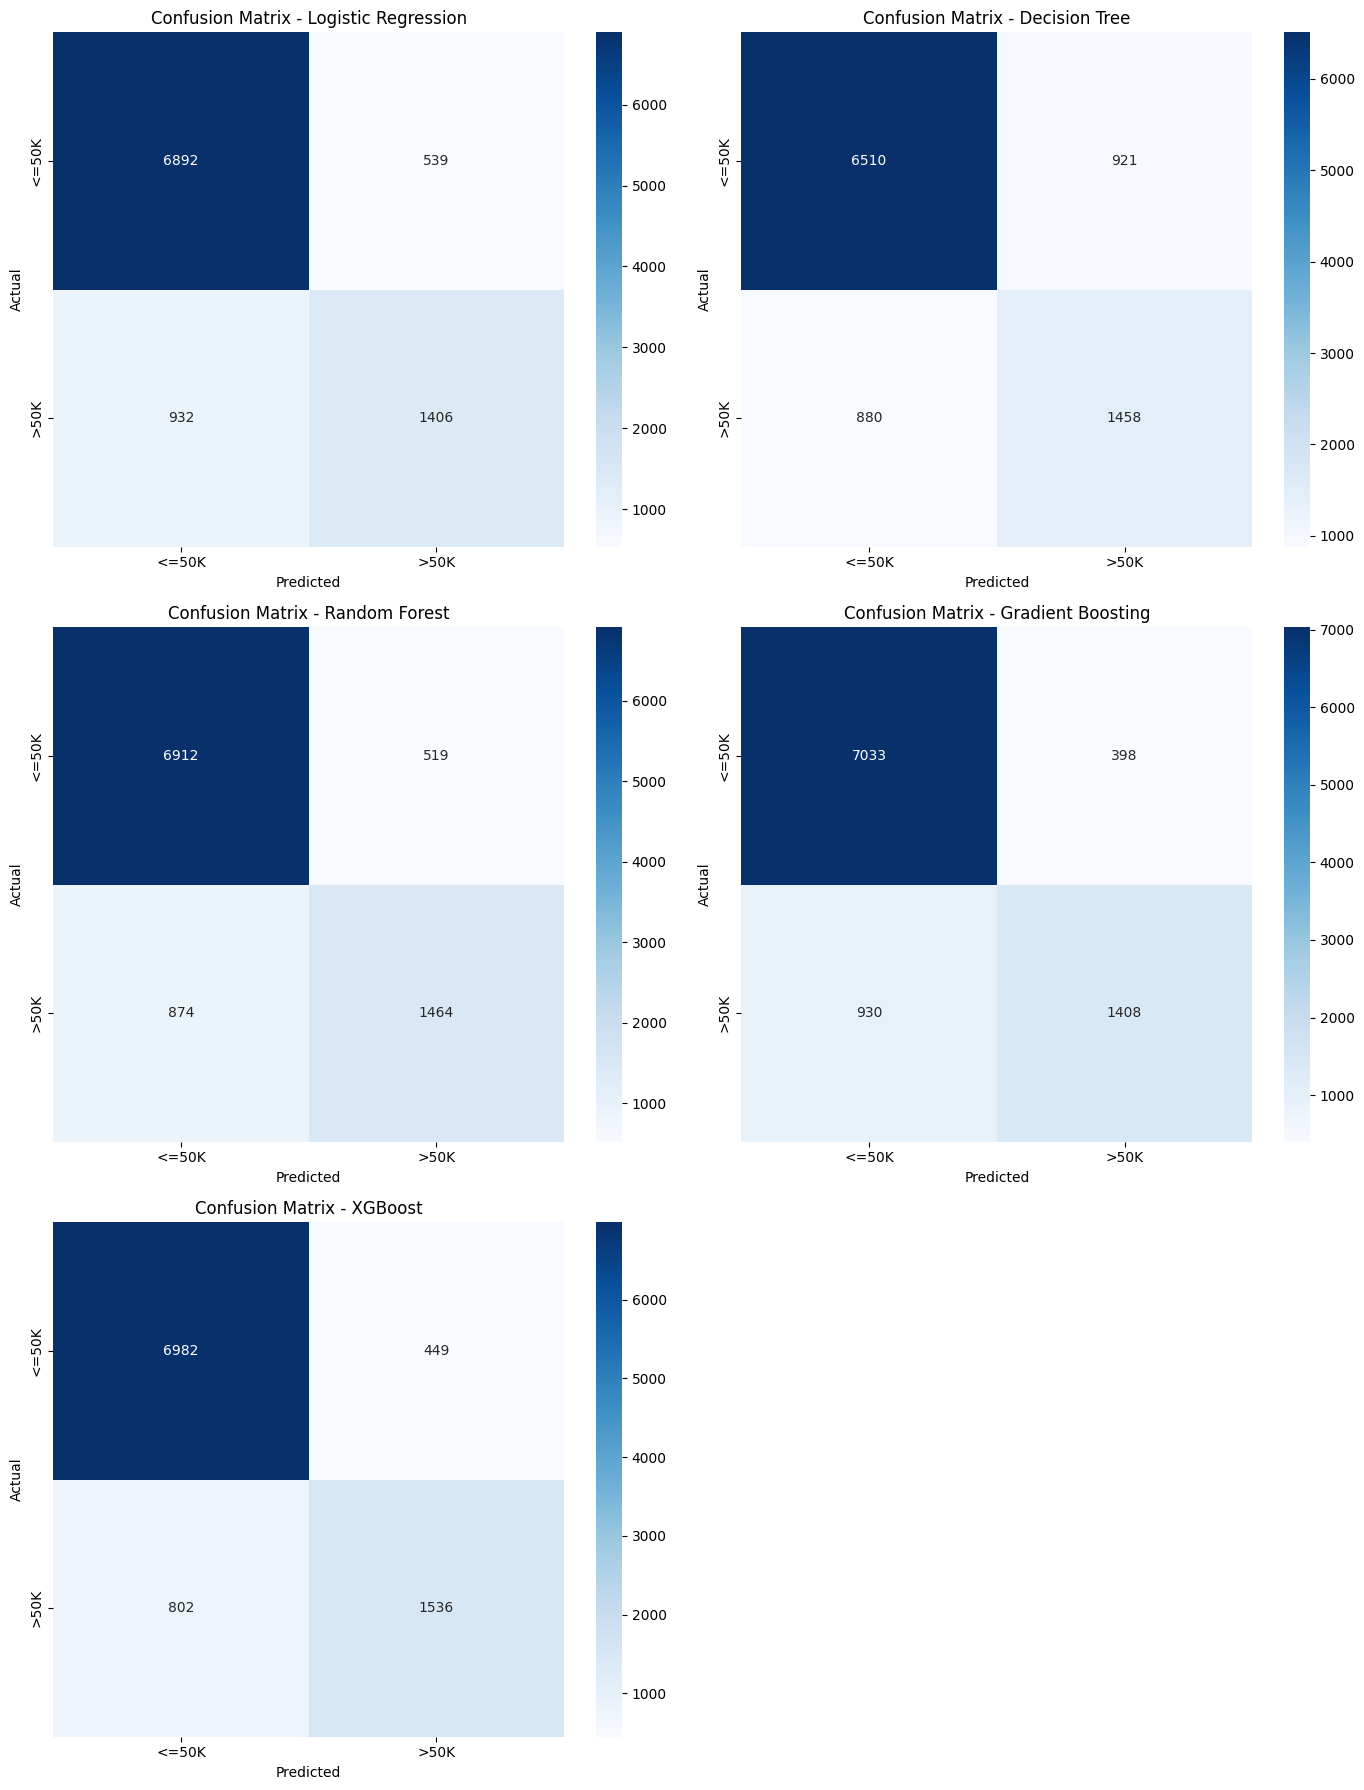

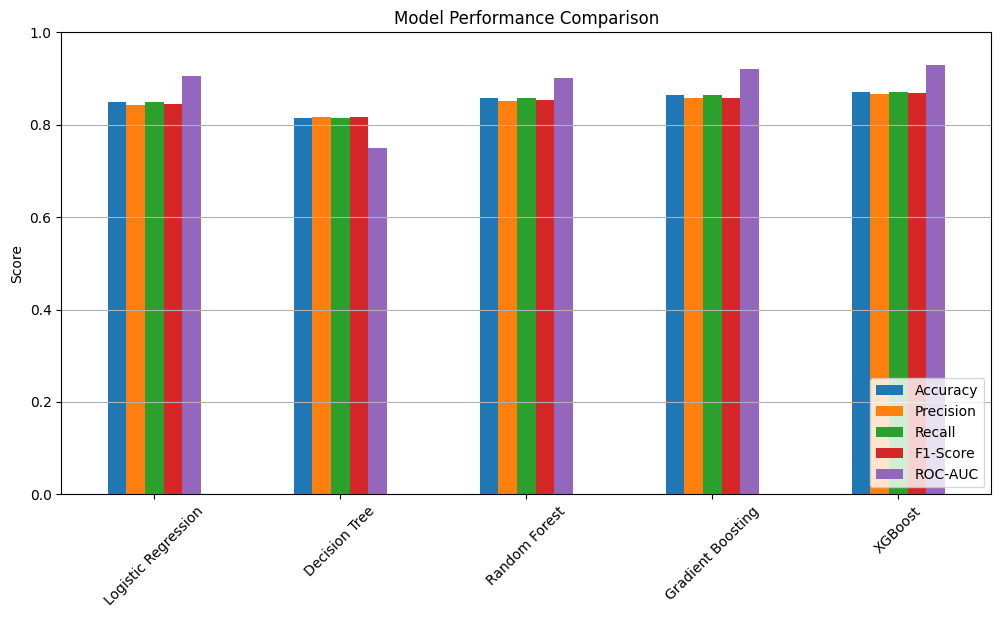

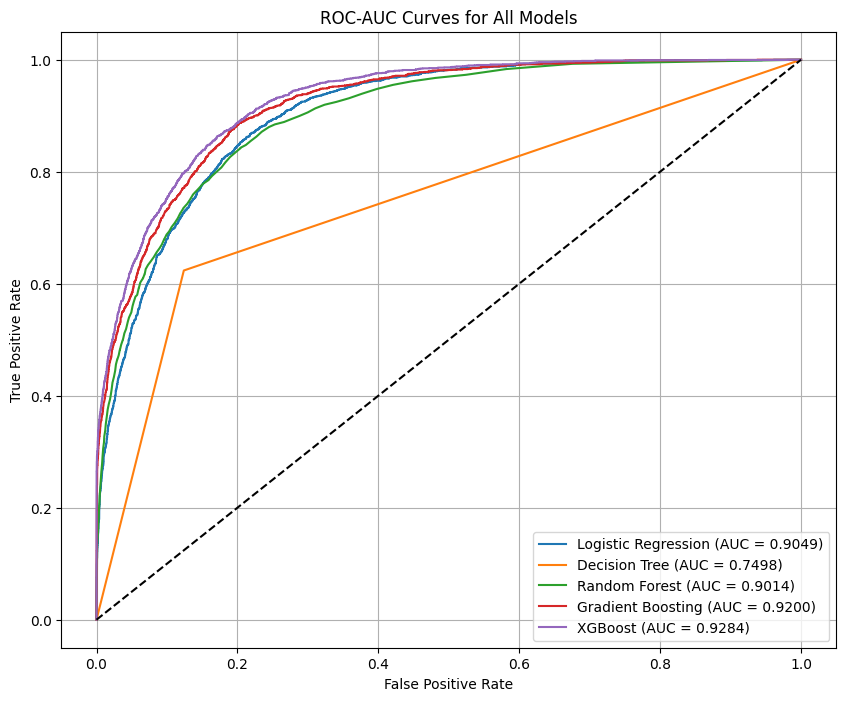

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.8494,0.8431,0.8494,0.8445,0.9049
Decision Tree,0.8156,0.8168,0.8156,0.8162,0.7498
Random Forest,0.8574,0.8520,0.8574,0.8532,0.9014
Gradient Boosting,0.8641,0.8584,0.8641,0.8577,0.9200
XGBoost,0.8719,0.8675,0.8719,0.8682,0.9284



Best Performing Model Based on ROC-AUC:
XGBoost with ROC-AUC: 0.9284


In [8]:
#Model Evaluation and Visualization


#Displaying heatmap Confusion Matrix for all models
fig = plt.figure(figsize=(14, 18))

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_preprocessed)
    cm = confusion_matrix(y_test_enc, y_pred)
    
    # Calculate subplot position (3 rows, 2 columns)
    plt.subplot(3, 2, idx + 1)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


performance_df = pd.DataFrame(model_performance).T.round(4)

#Visualizing all metrics of all models
performance_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()


#Visualizing ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for name, model in trained_models.items():
    y_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test_enc, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')  
plt.title("ROC-AUC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()


#Displaying model performance
display(performance_df)

#Best Performing Model (based on ROC-AUC)
print("\nBest Performing Model Based on ROC-AUC:")
best_model_name = performance_df['ROC-AUC'].idxmax()
best_model = trained_models[best_model_name]
best_model_roc_auc = performance_df.loc[best_model_name, 'ROC-AUC']
print(f"{best_model_name} with ROC-AUC: {best_model_roc_auc}")

## 6. Artificial Neural Networks (ANN)
Building and training a deep neural network with regularization and callbacks for binary classification of income levels.

In [9]:
# # ANN

# Clone preprocessor to avoid leakage
ann_preprocessor = clone(preprocessor)

# Fit ONLY on train split, not whole data
X_train_ann = ann_preprocessor.fit_transform(X_train)
X_test_ann = ann_preprocessor.transform(X_test)

# Target variable for ANN
y_train_ann = y_train_enc
y_test_ann = y_test_enc

print("ANN preprocessing complete.")

# Setting random seed for reproducibility
tf.random.set_seed(random_state)

# Building the ANN model
ann_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001),
          input_shape=(X_train_ann.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Training the ANN model
history = ann_model.fit(
    X_train_ann,
    y_train_ann,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


ANN preprocessing complete.
Epoch 1/50


c:\Users\Shaurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8145 - loss: 0.7238 - val_accuracy: 0.8502 - val_loss: 0.5805 - learning_rate: 0.0010
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8423 - loss: 0.5479 - val_accuracy: 0.8523 - val_loss: 0.4912 - learning_rate: 0.0010
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.4648 - val_accuracy: 0.8520 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.4129 - val_accuracy: 0.8525 - val_loss: 0.3936 - learning_rate: 0.0010
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8511 - loss: 0.3832 - val_accuracy: 0.8528 - val_loss: 0.3720 - learning_rate: 0.0010
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8513 - loss: 0.3638 - val_accuracy: 0.8543 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.3535 - val_accurac

In [11]:

# Evaluating ANN model
y_prob_ann = ann_model.predict(X_test_ann).ravel()
y_pred_ann = (y_prob_ann > 0.5).astype(int)



# ANN performance metrics
ann_metrics = {
    "Accuracy": accuracy_score(y_test_ann, y_pred_ann),
    "Precision": precision_score(y_test_ann, y_pred_ann),
    "Recall": recall_score(y_test_ann, y_pred_ann),
    "F1-Score": f1_score(y_test_ann, y_pred_ann),
    "ROC-AUC": roc_auc_score(y_test_ann, y_prob_ann)
}

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


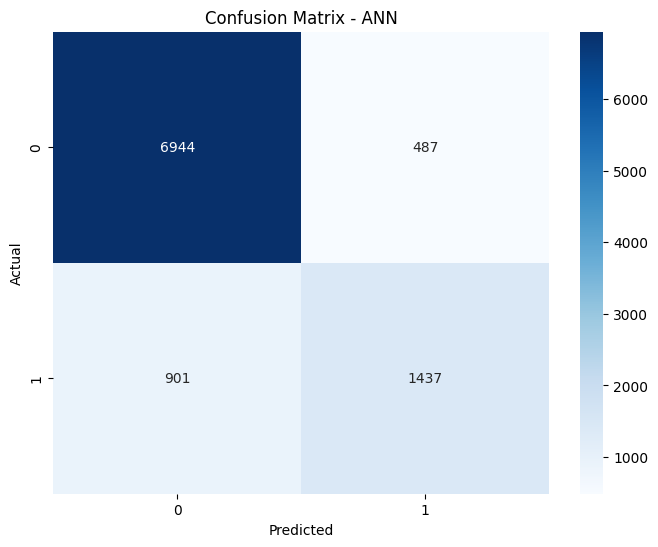

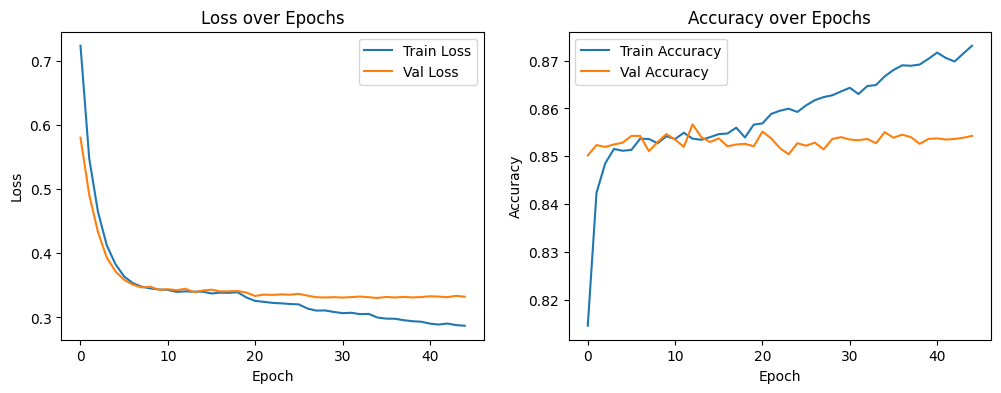

Training stopped at epoch: 45


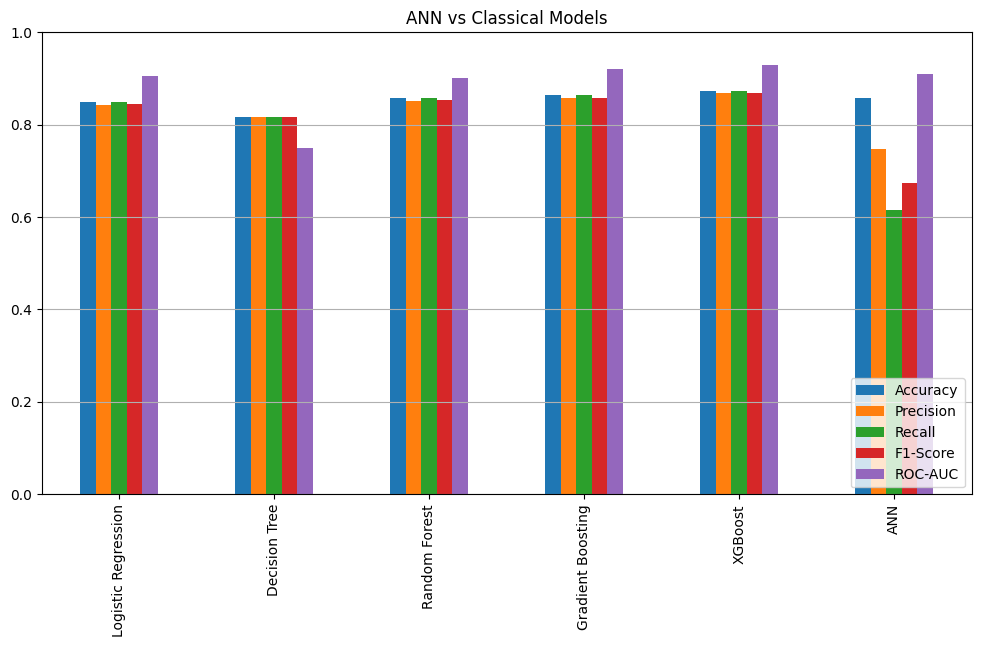

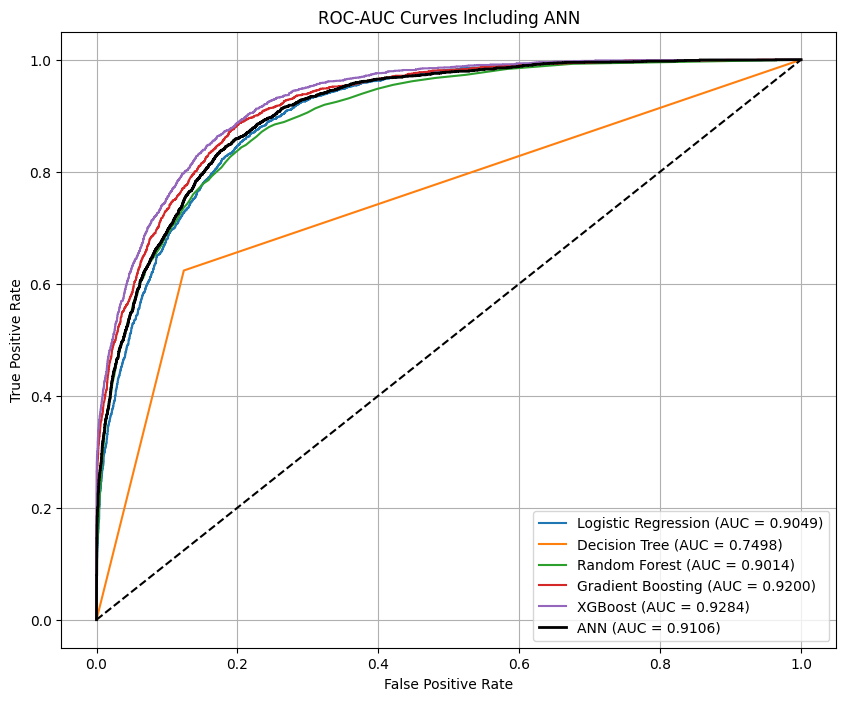


ANN Performance:
                0
Accuracy   0.8579
Precision  0.7469
Recall     0.6146
F1-Score   0.6743
ROC-AUC    0.9106


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.849400,0.843100,0.849400,0.844500,0.904900
Decision Tree,0.815600,0.816800,0.815600,0.816200,0.749800
Random Forest,0.857400,0.852000,0.857400,0.853200,0.901400
Gradient Boosting,0.864100,0.858400,0.864100,0.857700,0.920000
XGBoost,0.871900,0.867500,0.871900,0.868200,0.928400
ANN,0.857918,0.746881,0.614628,0.674331,0.910634



Best Performing Model Based on ROC-AUC After ANN:
XGBoost: 0.9284


In [12]:
#ANN Evaluation and Visualization

# Confusion Matrix
cm_ann = confusion_matrix(y_test_ann, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Loss and Accuracy Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')



plt.show()

print(f"Training stopped at epoch: {len(history.history['loss'])}")

#Comparing ANN with Classical Models
performance_df.loc["ANN"] = ann_metrics
performance_df.plot(kind='bar', figsize=(12,6))
plt.title("ANN vs Classical Models")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

#Displaying ANN ROC-AUC Curve with other models
plt.figure(figsize=(10,8))
for name, model in trained_models.items():
    y_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test_enc, y_proba):.4f})")
fpr_ann, tpr_ann, _ = roc_curve(y_test_ann, y_prob_ann)
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_score(y_test_ann, y_prob_ann):.4f})", color='black', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC-AUC Curves Including ANN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Displaying ANN performance metrics
ann_metrics_df = pd.DataFrame([ann_metrics]).T.round(4)
print("\nANN Performance:")
print(ann_metrics_df)

performance_df.loc["ANN"] = ann_metrics

#Again displaying best performing model after ANN
display(performance_df)

print("\nBest Performing Model Based on ROC-AUC After ANN:")
best_model_name = performance_df['ROC-AUC'].idxmax()
print(f"{best_model_name}: {performance_df.loc[best_model_name, 'ROC-AUC']}")

## 7. Feature Importance Analysis
Analyzing feature importance using Permutation Importance and SHAP values to understand model predictions.

In [13]:
# # Feature Importance Analysis

# Find best model based on ROC-AUC
best_model_name = max(model_performance, key=lambda x: model_performance[x]['ROC-AUC'])
best_model = trained_models[best_model_name]

# Permutation Importance

print(f"\nCalculating Permutation Importance for {best_model_name}...")

perm_importance = permutation_importance(
    best_model, X_test_preprocessed, y_test_enc, 
    n_repeats=10, random_state=random_state, n_jobs=-1
)

# Get feature names
ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
feature_names_cat = ohe.get_feature_names_out(ad_feat_cat)
all_feature_names = np.concatenate([ad_feat_num, feature_names_cat])

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': perm_importance.importances_mean,
}).sort_values(by='Importance', ascending=False)


# SHAP VALUES

print(f"\nCalculating SHAP values for {best_model_name}...")

# Use appropriate explainer based on model type

if best_model_name in ["XGBoost", "Random Forest", "Gradient Boosting"]:
    # Tree-based models: use TreeExplainer (faster)
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_preprocessed)
    # For binary classification, TreeExplainer returns [class0, class1]
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Use positive class (>50K)
    
elif best_model_name == "Logistic Regression":
    # Linear models: use LinearExplainer
    explainer = shap.LinearExplainer(best_model, X_train_preprocessed)
    shap_values = explainer.shap_values(X_test_preprocessed)  
    
else:
    # Generic explainer (slower but works for all models)
    # Subsample for speed if dataset is large
    sample_size = min(1000, X_train_preprocessed.shape[0])
    background = shap.sample(X_train_preprocessed, sample_size, random_state=random_state)
    explainer = shap.KernelExplainer(best_model.predict_proba, background)
    shap_values = explainer.shap_values(X_test_preprocessed[:100])  # Only first 100 for speed
    if isinstance(shap_values, list):
        shap_values = shap_values[1]





Calculating Permutation Importance for XGBoost...

Calculating SHAP values for XGBoost...



Top 10 Most Important Features:
                           Feature  Importance
                      capital_gain    0.048378
marital_status_ Married-civ-spouse    0.042717
                     education-num    0.025970
                               age    0.016256
                      capital_loss    0.015508
                    hours_per_week    0.007821
       occupation_ Exec-managerial    0.002344
                relationship_ Wife    0.002129
         occupation_ Other-service    0.001873
       occupation_ Protective-serv    0.001351


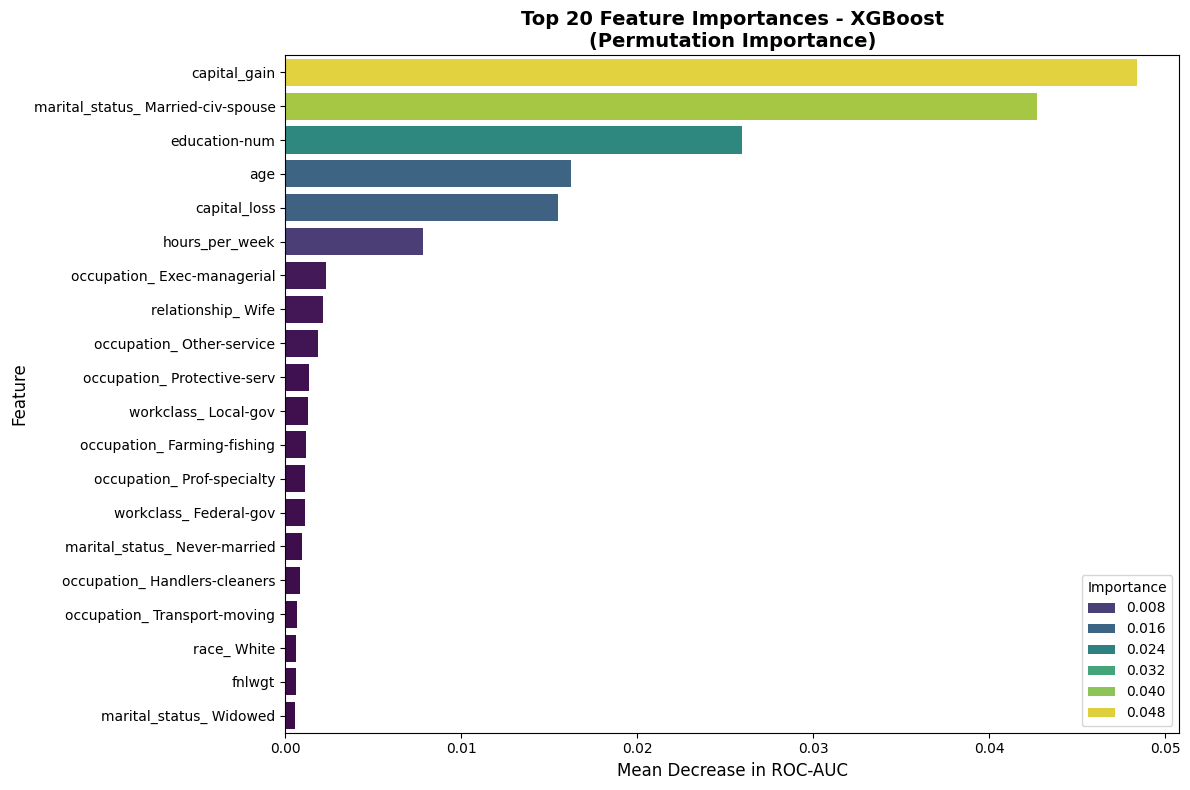

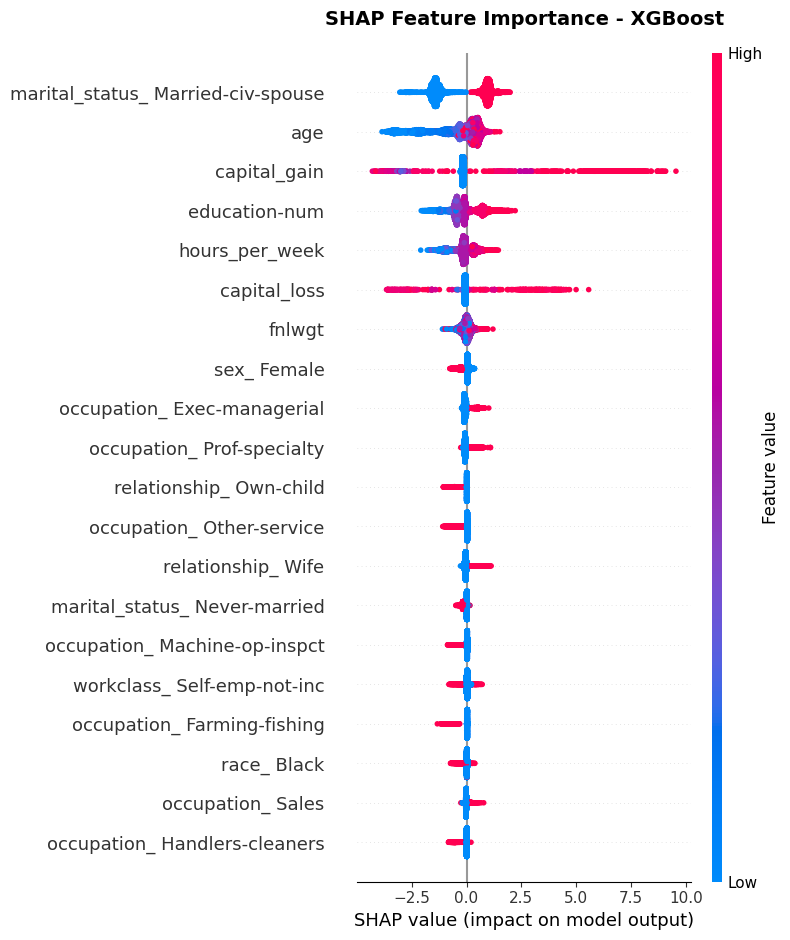

[[ 1.9814576e-01 -6.7467344e-01 -7.0128459e-01 ...  4.0526967e-03
   6.4346314e-05  0.0000000e+00]
 [-3.1562164e-01  5.8980677e-03  8.1234932e-01 ...  9.5756473e-03
   6.4346314e-05  0.0000000e+00]
 [ 3.8847396e-01  2.4599755e-01  6.6268343e-01 ...  6.4640865e-03
   6.4346314e-05  0.0000000e+00]
 ...
 [ 1.4069702e-01 -3.5803393e-02 -1.3236538e+00 ...  1.0573745e-02
   6.4346314e-05  0.0000000e+00]
 [ 5.3917229e-01  2.2253914e-02  7.2648245e-01 ...  2.0191861e-02
   4.8850698e-04  0.0000000e+00]
 [-7.5698900e-01 -3.0031232e-02 -4.2706555e-01 ...  1.4190128e-02
   6.4346314e-05  0.0000000e+00]]

Feature importance analysis completed.


In [14]:
#Visualizing Feature Importance Analysis

#Permutation Importance Results

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

# Visualize Permutation Importance
plt.figure(figsize=(12, 8))
top_20 = importance_df.head(20)
sns.barplot(x='Importance', y='Feature', data=top_20, hue='Importance', palette='viridis')
plt.title(f"Top 20 Feature Importances - {best_model_name}\n(Permutation Importance)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Mean Decrease in ROC-AUC", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()



# SHAP Summary Plot

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, features=X_test_preprocessed, feature_names=all_feature_names, show=False)
plt.title(f"SHAP Feature Importance - {best_model_name}", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
    
print(shap_values)
print("\nFeature importance analysis completed.")

#Feature importance analysis completed.

## 8. Dimensionality Reduction & Clustering
Applying PCA and t-SNE for dimensionality reduction and visualizing data structure with KMeans and Gaussian Mixture Models.

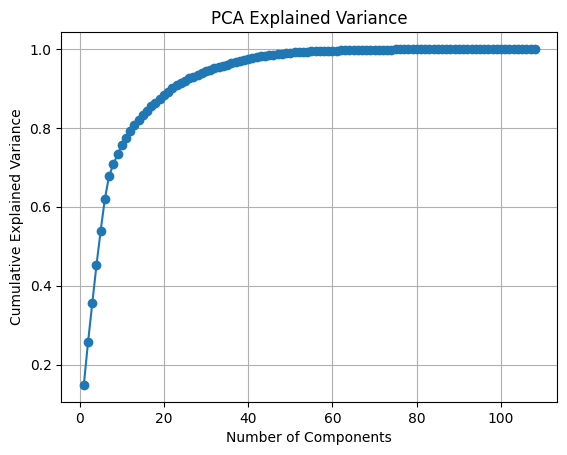

Original shape: (39073, 108)
Reduced shape: (39073, 2)


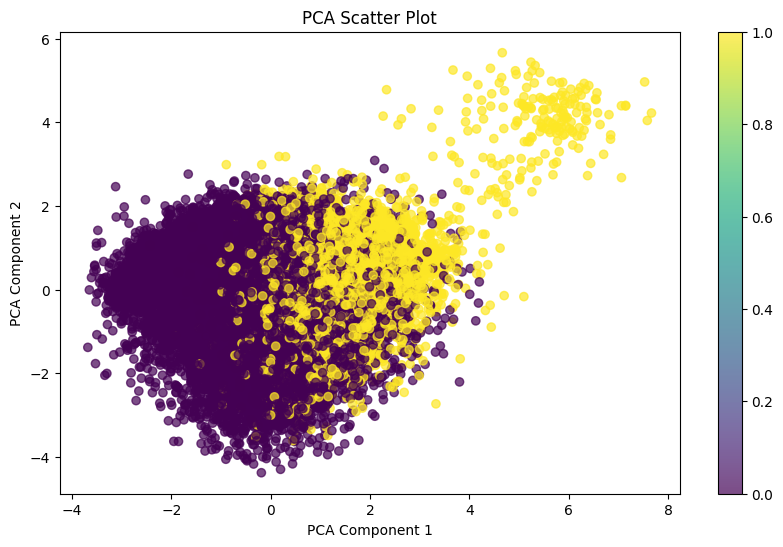

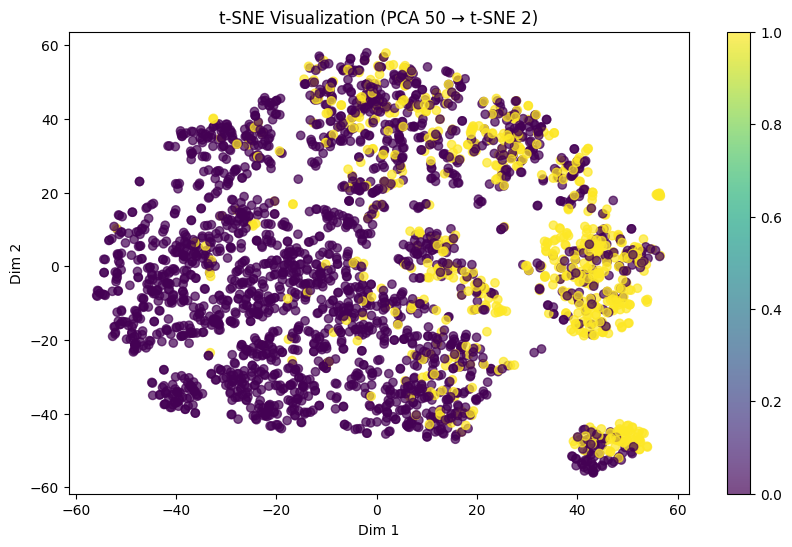

In [15]:
# Convert sparse to dense (once)
X_train_dense = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, "toarray") else X_train_preprocessed
X_test_dense  = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, "toarray") else X_test_preprocessed


# -------- PCA FULL VARIANCE ----------
pca_full = PCA(n_components=None)
pca_full.fit(X_train_dense)

plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


# -------- MAIN PCA (95% variance) ----------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca  = pca.transform(X_test_dense)

print("Original shape:", X_train_dense.shape)
print("Reduced shape:", X_train_pca.shape)


# -------- PCA 2D PLOT ----------
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], 
                      c=y_train_enc, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot")
plt.colorbar(scatter)
plt.show()


# ========== t-SNE (correct method) ==========
from sklearn.utils import shuffle

# sample only
X_sample, y_sample = shuffle(X_train_dense, y_train_enc, 
                             random_state=42, n_samples=3000)

# reduce to 50 PCs (recommended)
pca_tsne = PCA(n_components=50)
X_sample_pca50 = pca_tsne.fit_transform(X_sample)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample_pca50)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], 
                      c=y_sample, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization (PCA 50 → t-SNE 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(scatter)
plt.show()

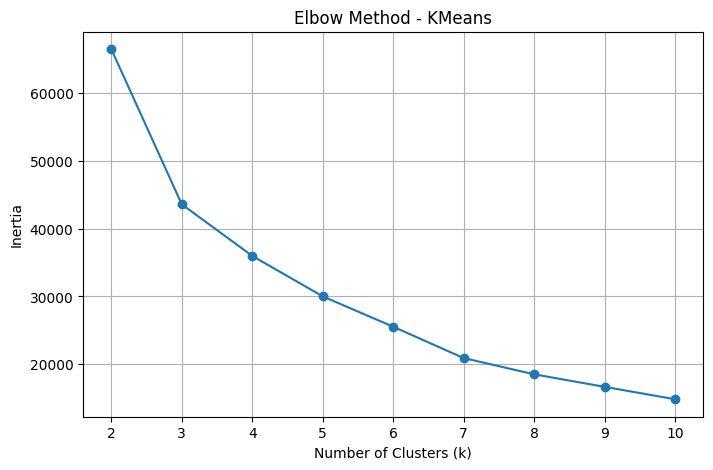

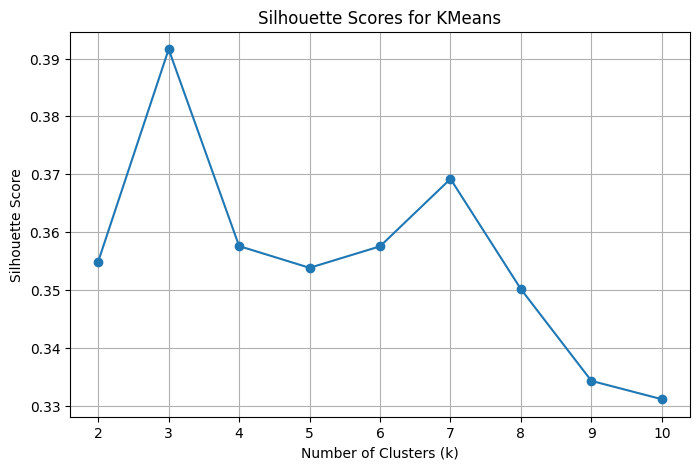


Best k according to Silhouette Score = 3

Cluster counts:
[ 9845 14725 14503]


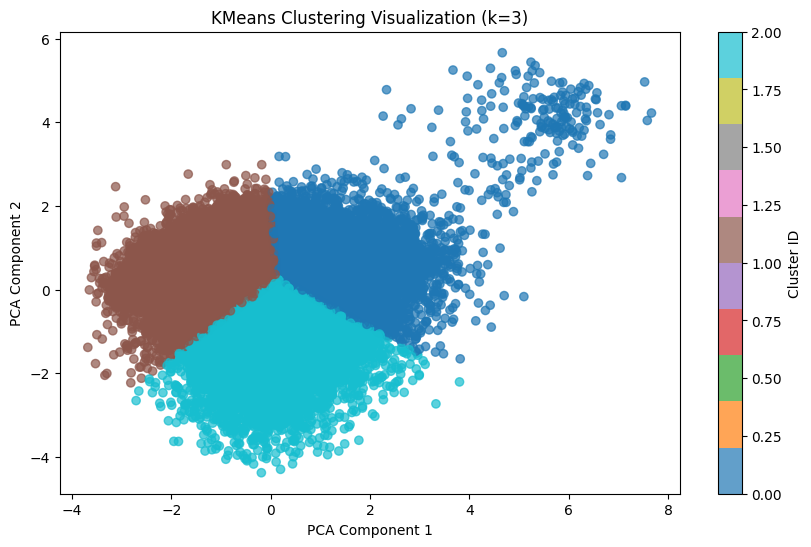


Visualizing KMeans with k=2 according to the dataset


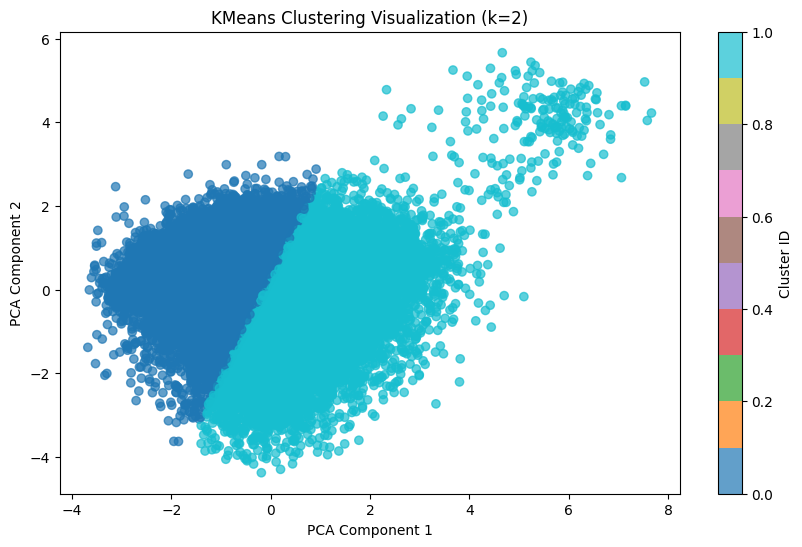

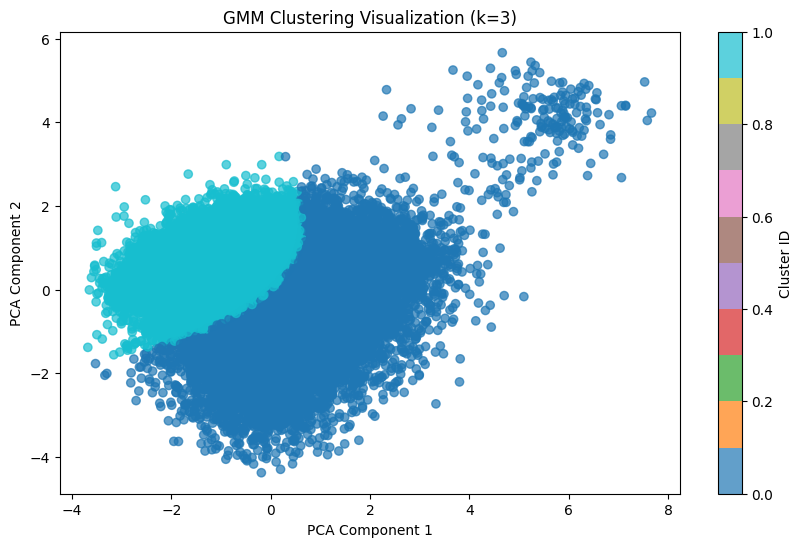

In [16]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


# Silhouette Score for best cluster separation

sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, cluster_labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Scores for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = list(K_range)[np.argmax(sil_scores)]
print(f"\nBest k according to Silhouette Score = {best_k}")


# Train final KMeans with best k

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_train_pca)

print("\nCluster counts:")
print(np.bincount(clusters))


# Cluster Visualization (Using PCA components)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=clusters, cmap='tab10', alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering Visualization (k={best_k})")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

# Visualizing KMeans using K = 2 assuming 2 main clusters
print("\nVisualizing KMeans with k=2 according to the dataset")
kmeans_k2 = KMeans(n_clusters=2, random_state=random_state)
kmeans_k2.fit(X_train_pca)
clusters_k2 = kmeans_k2.predict(X_train_pca)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=clusters_k2, cmap='tab10', alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering Visualization (k=2)")
plt.colorbar(scatter, label="Cluster ID")
plt.show()
# GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train_pca)
gmm_clusters = gmm.predict(X_train_pca)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=gmm_clusters, cmap='tab10', alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"GMM Clustering Visualization (k={best_k})")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

# Adult Income Analysis: Supervised and Unsupervised Learning

## Summary
This analysis compared classical machine learning models, an artificial neural network (ANN), and unsupervised learning techniques for predicting adult income levels. Feature importance and dimensionality reduction techniques provided insights into the most predictive features and the underlying data structure.


## Data Issues
The dataset initially contained several challenges:  

1. **Missing values:** 6,465 entries.  
2. **Inconsistent target values:** `" <50K"` and `"<50K"` were treated as separate income levels.  
3. **Imbalanced numerical ranges:** Columns such as `hours_per_week` and `fnlwgt` were on vastly different scales.  
4. **Placeholder values:** `"?"` entries required conversion to `NaN`.


## Data Cleaning and Preprocessing
These issues were addressed through:  

- **Exploratory Data Analysis (EDA)** to identify anomalies and visualize distributions.  
- **Conversion of `"?"` to `NaN`** and handling missing values.  
- **Standardization and scaling** of numerical features.  
- **Correction of target variable inconsistencies** for uniform labeling.


## Model Performance

### Classical Models and ANN
The dataset was trained using:  

- Logistic Regression  
- Decision Trees  
- Random Forest  
- Gradient Boosting  
- XGBoost  

An **Artificial Neural Network (ANN)** was also applied.  
**Result:** **XGBoost** emerged as the best-performing model, consistent with findings on the dataset’s reference documentation.

### Feature Importance
Feature Importance Analysis, based on the most accurate model (XGBoost), using both SHAP and Permutation importance, showed that `capital_gain`, `marital_status_ Married-civ-spouse` were among the most important features in the dataset. 

### Dimensionality Reduction
- **PCA** condensed the feature space and highlighted main variance directions.  
- **t-SNE** provided a 2D visualization of PCA-transformed data for exploratory purposes.
- The results suggested that an optimal number of clusters in the PCA-transformed space would be in the 30s, reflecting a broad spread of the data and the absence of clearly defined clusters.

### Unsupervised Learning
- **K-Means Clustering** and **Gaussian Mixture Models** were applied.  
- **Observation:** Both methods indicated significant overlap between data points, with **no clear cluster separation**, reflecting the complex distribution of income-related features.


### Insights
- Supervised models, particularly XGBoost, effectively predict income levels and provide feature importance insights.  
- Clustering metrics like **ARI or NMI** can be applied since true labels are known, but geometric separation is limited.  
- Dimensionality reduction is useful for visualization but does not guarantee distinct natural clusters in this dataset.
